In [463]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [464]:
import seaborn as sns
import matplotlib.pyplot as plt

In [465]:
df = pd.read_csv("MALratings.csv")

In [466]:
df

,Title,Genres,Rank,Popularity,Score,Episodes,Episode length,Release Date
0,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Comedy,Suspense",13,404,8.99,12,23 min. per ep.,Spring 2022
1,3-gatsu no Lion 2nd Season,"Drama,Slice of Life",14,533,8.96,22,25 min. per ep.,Fall 2017
2,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,"Action,Comedy,Sci-Fi",19,939,8.93,1,1 hr. 50 min.,NaN
3,Gintama.,"Action,Comedy,Sci-Fi",12,735,8.99,12,24 min. per ep.,Winter 2017
4,Koe no Katachi,NaN,15,19,8.96,1,2 hr. 10 min.,NaN
...,...,...,...,...,...,...,...,...
20338,Steins;Gate,"Drama,Sci-Fi,Suspense",4,13,9.08,24,24 min. per ep.,Spring 2011
20339,High Score,"Comedy,Slice of Life",10527,6095,5.58,8,3 min. per ep.,Fall 2011
20340,Noraneko,NaN,8706,5064,6.04,1,35 sec.,NaN
20341,"Suki de Suki de, Suki de The Animation",NaN,/A,5329,6.81,2,27 min. per ep.,NaN


In [467]:
df.dtypes

Title              object
Genres             object
Rank               object
Popularity          int64
Score             float64
Episodes           object
Episode length     object
Release Date       object
dtype: object

In [468]:
df.columns

Index(['Title', 'Genres', 'Rank', 'Popularity', 'Score', 'Episodes',
       'Episode length', 'Release Date'],
      dtype='object')

In [482]:
df.describe()

,Popularity,Score
count,20343.000000,14019.000000
mean,10174.477953,6.451633
std,5874.844237,0.905774
min,1.000000,1.840000
25%,5086.500000,5.830000
50%,10175.000000,6.460000
75%,15263.500000,7.110000
max,20349.000000,9.140000


In [469]:
df.shape

(20343, 8)

In [470]:
df['binned_score'] = pd.cut(df.Score, bins = [0,2.01,4.03,4.40,4.76,5.13,5.49,5.86,6.22,6.59,6.95,7.32,7.68,8.05,8.41,8.78,10], labels = ['0-2.01', '2.01,4.03', '4.03-4.40', '4.40-4.76', '4.76-5.13', '5.13-5.49', '5.49-5.86', '5.86-6.22', '6.22-6.59', '6,59-6.95', '6.95-7.32', '7.32-7.68', '7.68-8.05', '8.05-8.41', '8.41-8.70', '8.7-10'])

In [471]:
df.head()

,Title,Genres,Rank,Popularity,Score,Episodes,Episode length,Release Date,binned_score
0,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Comedy,Suspense",13,404,8.99,12,23 min. per ep.,Spring 2022,8.7-10
1,3-gatsu no Lion 2nd Season,"Drama,Slice of Life",14,533,8.96,22,25 min. per ep.,Fall 2017,8.7-10
2,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,"Action,Comedy,Sci-Fi",19,939,8.93,1,1 hr. 50 min.,NaN,8.7-10
3,Gintama.,"Action,Comedy,Sci-Fi",12,735,8.99,12,24 min. per ep.,Winter 2017,8.7-10
4,Koe no Katachi,NaN,15,19,8.96,1,2 hr. 10 min.,NaN,8.7-10


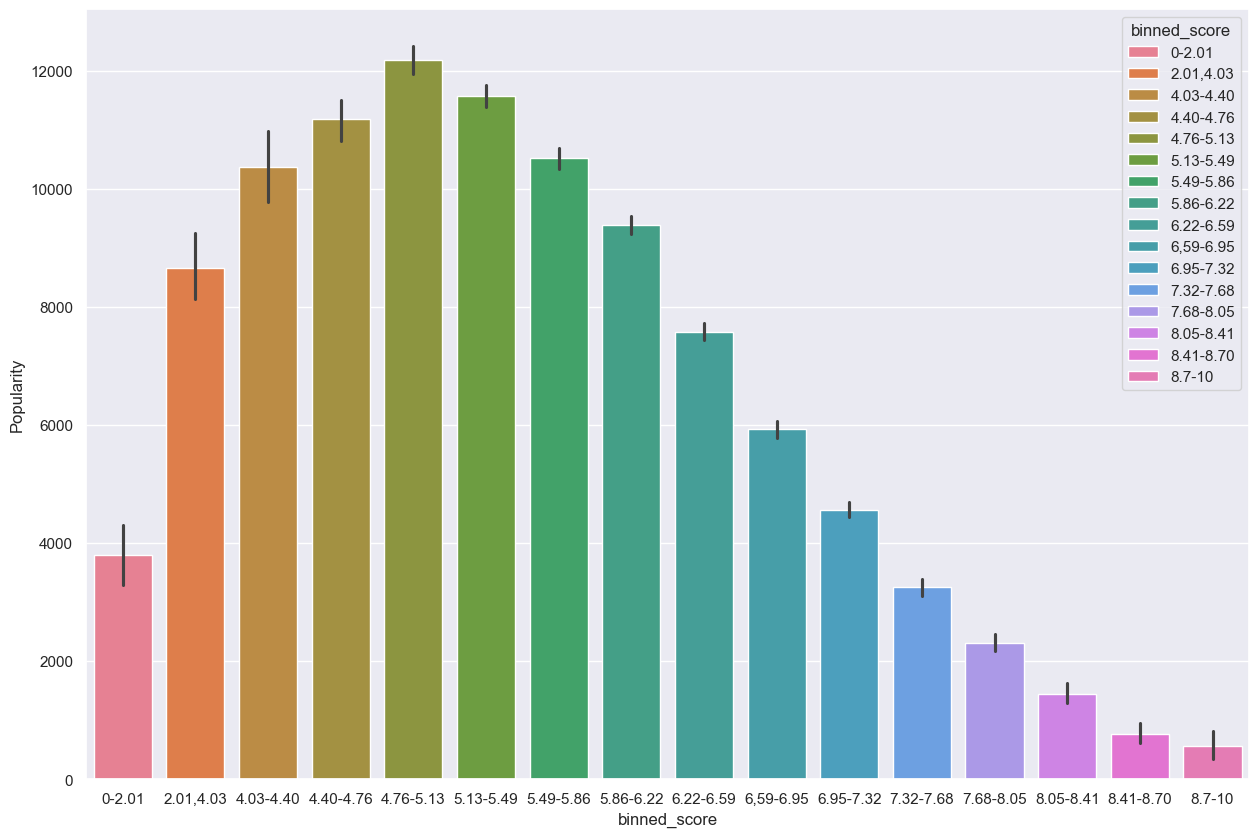

In [472]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.barplot(data=df, x = 'binned_score', y = 'Popularity', hue = 'binned_score')

plt.savefig("popularity_distribution.png")

In [473]:
df_genres = df[['Rank', 'Title', 'Genres', 'Episodes']]

In [474]:
df_genres.head()

,Rank,Title,Genres,Episodes,binned_score
0,13,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Comedy,Suspense",12,8.7-10
1,14,3-gatsu no Lion 2nd Season,"Drama,Slice of Life",22,8.7-10
2,19,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,"Action,Comedy,Sci-Fi",1,8.7-10
3,12,Gintama.,"Action,Comedy,Sci-Fi",12,8.7-10
4,15,Koe no Katachi,NaN,1,8.7-10


In [475]:
df_genres.head()

,Rank,Title,Genres,Episodes,binned_score
0,13,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Comedy,Suspense",12,8.7-10
1,14,3-gatsu no Lion 2nd Season,"Drama,Slice of Life",22,8.7-10
2,19,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,"Action,Comedy,Sci-Fi",1,8.7-10
3,12,Gintama.,"Action,Comedy,Sci-Fi",12,8.7-10
4,15,Koe no Katachi,NaN,1,8.7-10


In [476]:
df_genres.isnull().sum()

Rank                0
Title               0
Genres          10327
Episodes            0
binned_score     6324
dtype: int64

In [477]:
df_genres['Rank'] = pd.to_numeric(df_genres['Rank'],errors='coerce') # set invalid values to NaN

/var/folders/jv/9vwvk0dd59bdfshh1lp_mf8m0000gn/T/ipykernel_28441/2793154587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genres['Rank'] = pd.to_numeric(df_genres['Rank'],errors='coerce') # set invalid values to NaN


In [478]:
df_genres['Episodes'] = pd.to_numeric(df_genres['Episodes'],errors='coerce') # set invalid values to NaN

/var/folders/jv/9vwvk0dd59bdfshh1lp_mf8m0000gn/T/ipykernel_28441/2259875359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genres['Episodes'] = pd.to_numeric(df_genres['Episodes'],errors='coerce') # set invalid values to NaN


In [443]:
df_genres = df_genres.dropna()

In [444]:
df_genres.isnull().sum()

Rank        0
Title       0
Genres      0
Episodes    0
dtype: int64

In [445]:
df_genres.dtypes

Rank        float64
Title        object
Genres       object
Episodes    float64
dtype: object

In [446]:
df_genres.shape

(9322, 4)

In [447]:
df_genres.head()

,Rank,Title,Genres,Episodes
0,13.0,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Comedy,Suspense",12.0
1,14.0,3-gatsu no Lion 2nd Season,"Drama,Slice of Life",22.0
2,19.0,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,"Action,Comedy,Sci-Fi",1.0
3,12.0,Gintama.,"Action,Comedy,Sci-Fi",12.0
5,49.0,Mo Dao Zu Shi: Wanjie Pian,"Action,Drama,Supernatural",12.0


In [448]:
df_genres['Genres'] = df_genres['Genres'].str.replace(' ', '')

In [449]:
df_genres.head()

,Rank,Title,Genres,Episodes
0,13.0,Kaguya-sama wa Kokurasetai: Ultra Romantic,"Comedy,Suspense",12.0
1,14.0,3-gatsu no Lion 2nd Season,"Drama,SliceofLife",22.0
2,19.0,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,"Action,Comedy,Sci-Fi",1.0
3,12.0,Gintama.,"Action,Comedy,Sci-Fi",12.0
5,49.0,Mo Dao Zu Shi: Wanjie Pian,"Action,Drama,Supernatural",12.0


In [450]:
df_enc = df_genres.join(pd.concat([df_genres['Genres'].str.get_dummies(sep=',')])).drop('Genres',axis=1)

In [451]:
df_enc.head()

,Rank,Title,Episodes,Action,Adventure,AvantGarde,AwardWinning,BoysLove,Comedy,Drama,...,GirlsLove,Gourmet,Horror,Mystery,Romance,Sci-Fi,SliceofLife,Sports,Supernatural,Suspense
0,13.0,Kaguya-sama wa Kokurasetai: Ultra Romantic,12.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,14.0,3-gatsu no Lion 2nd Season,22.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,19.0,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,12.0,Gintama.,12.0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5,49.0,Mo Dao Zu Shi: Wanjie Pian,12.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [452]:
a = df_enc.drop(['Rank','Title'], axis = 1)

In [453]:
cos_sim = cosine_similarity(a, a)

In [454]:
cos_sim

array([[1.        , 0.99108149, 0.53794383, ..., 0.99399027, 0.98815105,
        0.48115159],
       [0.99108149, 1.        , 0.49897013, ..., 0.99723671, 0.98828719,
        0.44629245],
       [0.53794383, 0.49897013, 1.        , ..., 0.51948227, 0.55391171,
        0.4472136 ],
       ...,
       [0.99399027, 0.99723671, 0.51948227, ..., 1.        , 0.9821775 ,
        0.44605351],
       [0.98815105, 0.98828719, 0.55391171, ..., 0.9821775 , 1.        ,
        0.49543369],
       [0.48115159, 0.44629245, 0.4472136 , ..., 0.44605351, 0.49543369,
        1.        ]])

In [455]:
df_genres = df_genres.reset_index(drop=True)

In [456]:
results = {}

In [457]:
for idx, row in df_genres.iterrows():
    similar_indices = cos_sim[idx].argsort()[:-100:-1]
    similar_items = [(cos_sim[idx][i], df_genres['Rank'].iloc[[i]].tolist()[0]) 
                     for i in similar_indices]     
    results[row['Rank']] = similar_items[1:]

In [458]:
def get_name(a_id):
    return df_genres[df_genres['Rank'] == a_id]['Title'].tolist()[0].split(' - ')[0] 

In [459]:
def recommend(item_id, N):
    print(f"Recommending {N} anime similar to {get_name(item_id)} ...")
    print("---------------------")
    
    recs = results[item_id][:N]
    for rec in recs:
        print(f"\tRecommended with a score {rec[0]}:\t{get_name(rec[1])} ")

In [460]:
get_name(879)

'Tokyo Ghoul'

In [461]:
recommend(879, 30)

Recommending 30 anime similar to Tokyo Ghoul ...
---------------------
	Recommended with a score 1.0:	Tokyo Ghoul 
	Recommended with a score 1.0:	Tokyo Ghoul:re 2nd Season 
	Recommended with a score 1.0:	Gibiate 
	Recommended with a score 1.0:	Tokyo Ghoul √A 
	Recommended with a score 0.9966158955401238:	Dorohedoro 
	Recommended with a score 0.9966158955401238:	Ayakashi 
	Recommended with a score 0.99659283506935:	Ao no Exorcist: Kyoto Fujouou-hen 
	Recommended with a score 0.99659283506935:	Dinghai Fusheng Lu 
	Recommended with a score 0.99659283506935:	Soukou Musume Senki 
	Recommended with a score 0.99659283506935:	Quanzhi Fashi 
	Recommended with a score 0.99659283506935:	Pupa 
	Recommended with a score 0.99659283506935:	Higanjima X 
	Recommended with a score 0.99659283506935:	Lord of Vermilion: Guren no Ou 
	Recommended with a score 0.99659283506935:	Ulysses: Jehanne Darc to Renkin no Kishi 
	Recommended with a score 0.99659283506935:	Assault Lily: Bouquet 
	Recommended with a sco